#Identifikasi Masalah
## 1. Ketidaktepatan strategi penjualan di tiap cabang Superstore
## 2. Program Diskon besar saat tingkat penjualan sedang tinggi sehingga mengalami kerugian toko.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_squared_error
from sklearn.cluster import KMeans


In [16]:
df= pd.read_csv('/content/SuperStore - data.csv')

In [17]:
df

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.2480,3,0.20,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.9600,2,0.00,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.5760,2,0.20,19.3932,Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.6000,4,0.00,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [19]:
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371023,229.858001,3.789574,0.156203,28.656896
std,32063.704510,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
df.dropna(inplace=True)

In [23]:
#Memilih fitur untukn clasterisasi
features = df[['Sales','Profit','Discount']]

In [25]:
#Normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_features = scaler.fit_transform(features)

Pemilihan Jumlah Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

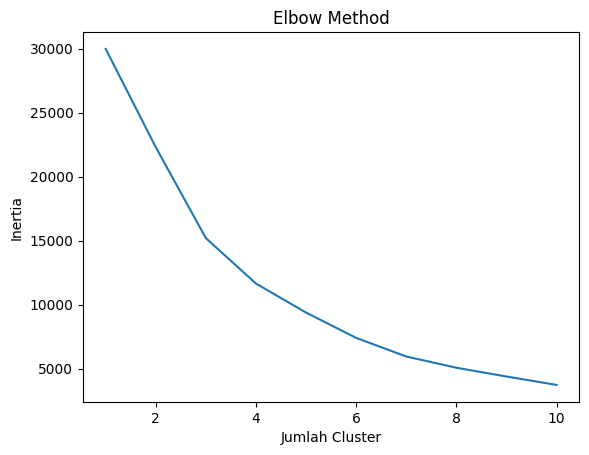

In [33]:

  # Metode Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [40]:
k = 3  # Misalkan jumlah cluster yang dipilih berdasarkan analisis Elbow
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(Scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [44]:
# Tambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

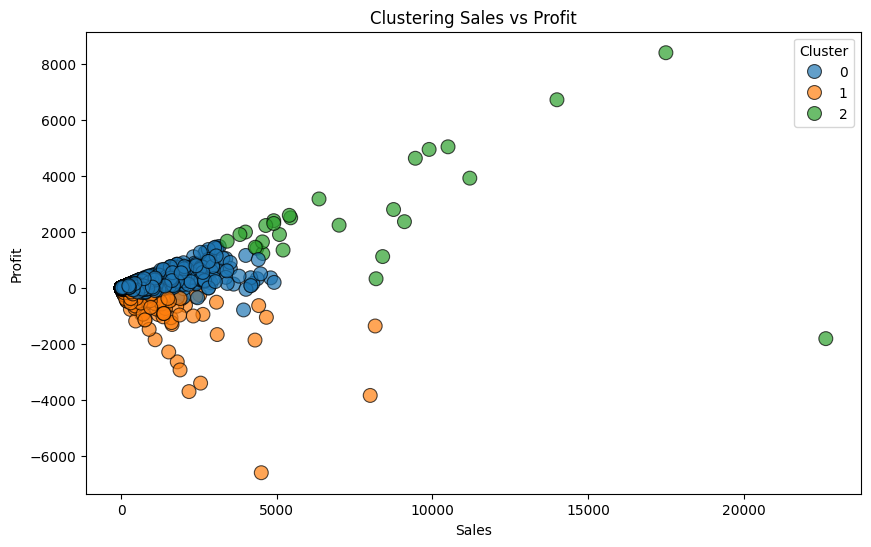

In [46]:
# Visualisasikan hasil clustering dengan warna yang lebih jelas
plt.figure(figsize=(10, 6))
palette = sns.color_palette('tab10', n_colors=k)
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', palette=palette, data=df, s=100, alpha=0.7, edgecolor='k')
plt.title('Clustering Sales vs Profit')
plt.legend(title='Cluster')
plt.show()

# Kesimpulan
1. Cluster Biru terdiri dari cabang superstore dengan sales dan profit yang rendah (Kemungkinan cabang tersebut terletak di daerah dengan populasi kecil dengan tingkat persaingan yang tinggi)
2. Cluster Hijau cabang superstore dengan sales dan profit yang tinggi (Kemungkinan cabang tersebut terletak di daerah dengan populasi yang besar atau tingkat persaingan yang rendah)
3. Cluster Orange ialah cabang superstore dengan sales dan profit yang beragam (Kemungkinan kluster ini mewakili cabng yang memiliki performa yang tidak konsisten atau dipengaruhi oleh faktor-faktor lain )

#Interpretasi

1. Cluster Biru : Membutuhkan strategi penjualan yang fokus pada peningkatan visibilitas dan atraksi pelanggan. hal ini dilakukan dengan meningkatkan promosi, mengadakan event atau menawarkan program diskon yang menarik.
2. Cluster Hijau : Cluster ini dapat menerapkan strategi penjualan yang fokus pada mempertahankan pelanggan dan meningkatkan loyalitas. cluster dapat melakukan hal seperti menawarkan membership, memberikan reward kepada pelanggan setia atau meningkatkan kualitas layanan pelanggan.
3. Cluster Orange : Membutuhkan analisis yang lebih mendalam untuk menentukan strategi penjualan yang tepat. analisis faktor yang mungkin mempengaruhi kinerja cabang, seperti demografi pelanggan, trend pasar dan kondisi ekonomi.